# Correlation matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown as Markdown, display

data = pd.read_csv("wijkbuurtkaart_for_eda.csv")
print(data.shape)
data.head()

(471, 59)


,bevolkingsdichtheid_inwoners_per_km2,aantal_inwoners,mannen,vrouwen,geboorte_totaal,geboortes_per_1000_inwoners,sterfte_totaal,sterfte_relatief,aantal_huishoudens,gemiddelde_huishoudsgrootte,...,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,westerse_migratieachtergrond,niet_westerse_migratieachtergrond,uit_marokko,uit_nederlandse_antillen_en_aruba,uit_suriname,uit_turkije,overige_nietwestersemigratieachtergrond
0,18567,1115,650,465,5,5,5,4,770,1.4,...,515,200,46,390,211,0,11,33,11,144
1,7756,695,390,305,5,9,0,1,510,1.4,...,351,127,30,243,118,6,6,13,6,83
2,27483,1650,860,790,15,8,5,5,1145,1.4,...,755,286,103,561,346,16,16,49,16,247
3,7360,370,205,165,5,5,0,3,245,1.5,...,149,71,24,140,40,3,0,3,7,29
4,8638,695,385,310,10,9,5,7,510,1.4,...,372,91,40,194,104,6,6,13,6,69


In [2]:
#data.columns.to_list()

# High correlated columns

In [3]:
numeric_data = data.select_dtypes(include=[np.number])

In [4]:
corrMatrix = numeric_data.corrwith(numeric_data["gemiddelde_woningwaarde"]) # finding correlations

high_corr = [(index, value) for index, value in corrMatrix.items() if value > 0.7 ]
high_corr

[('gemiddelde_woningwaarde', 1.0)]

<AxesSubplot: title={'center': 'Correlation of numeric factors'}>

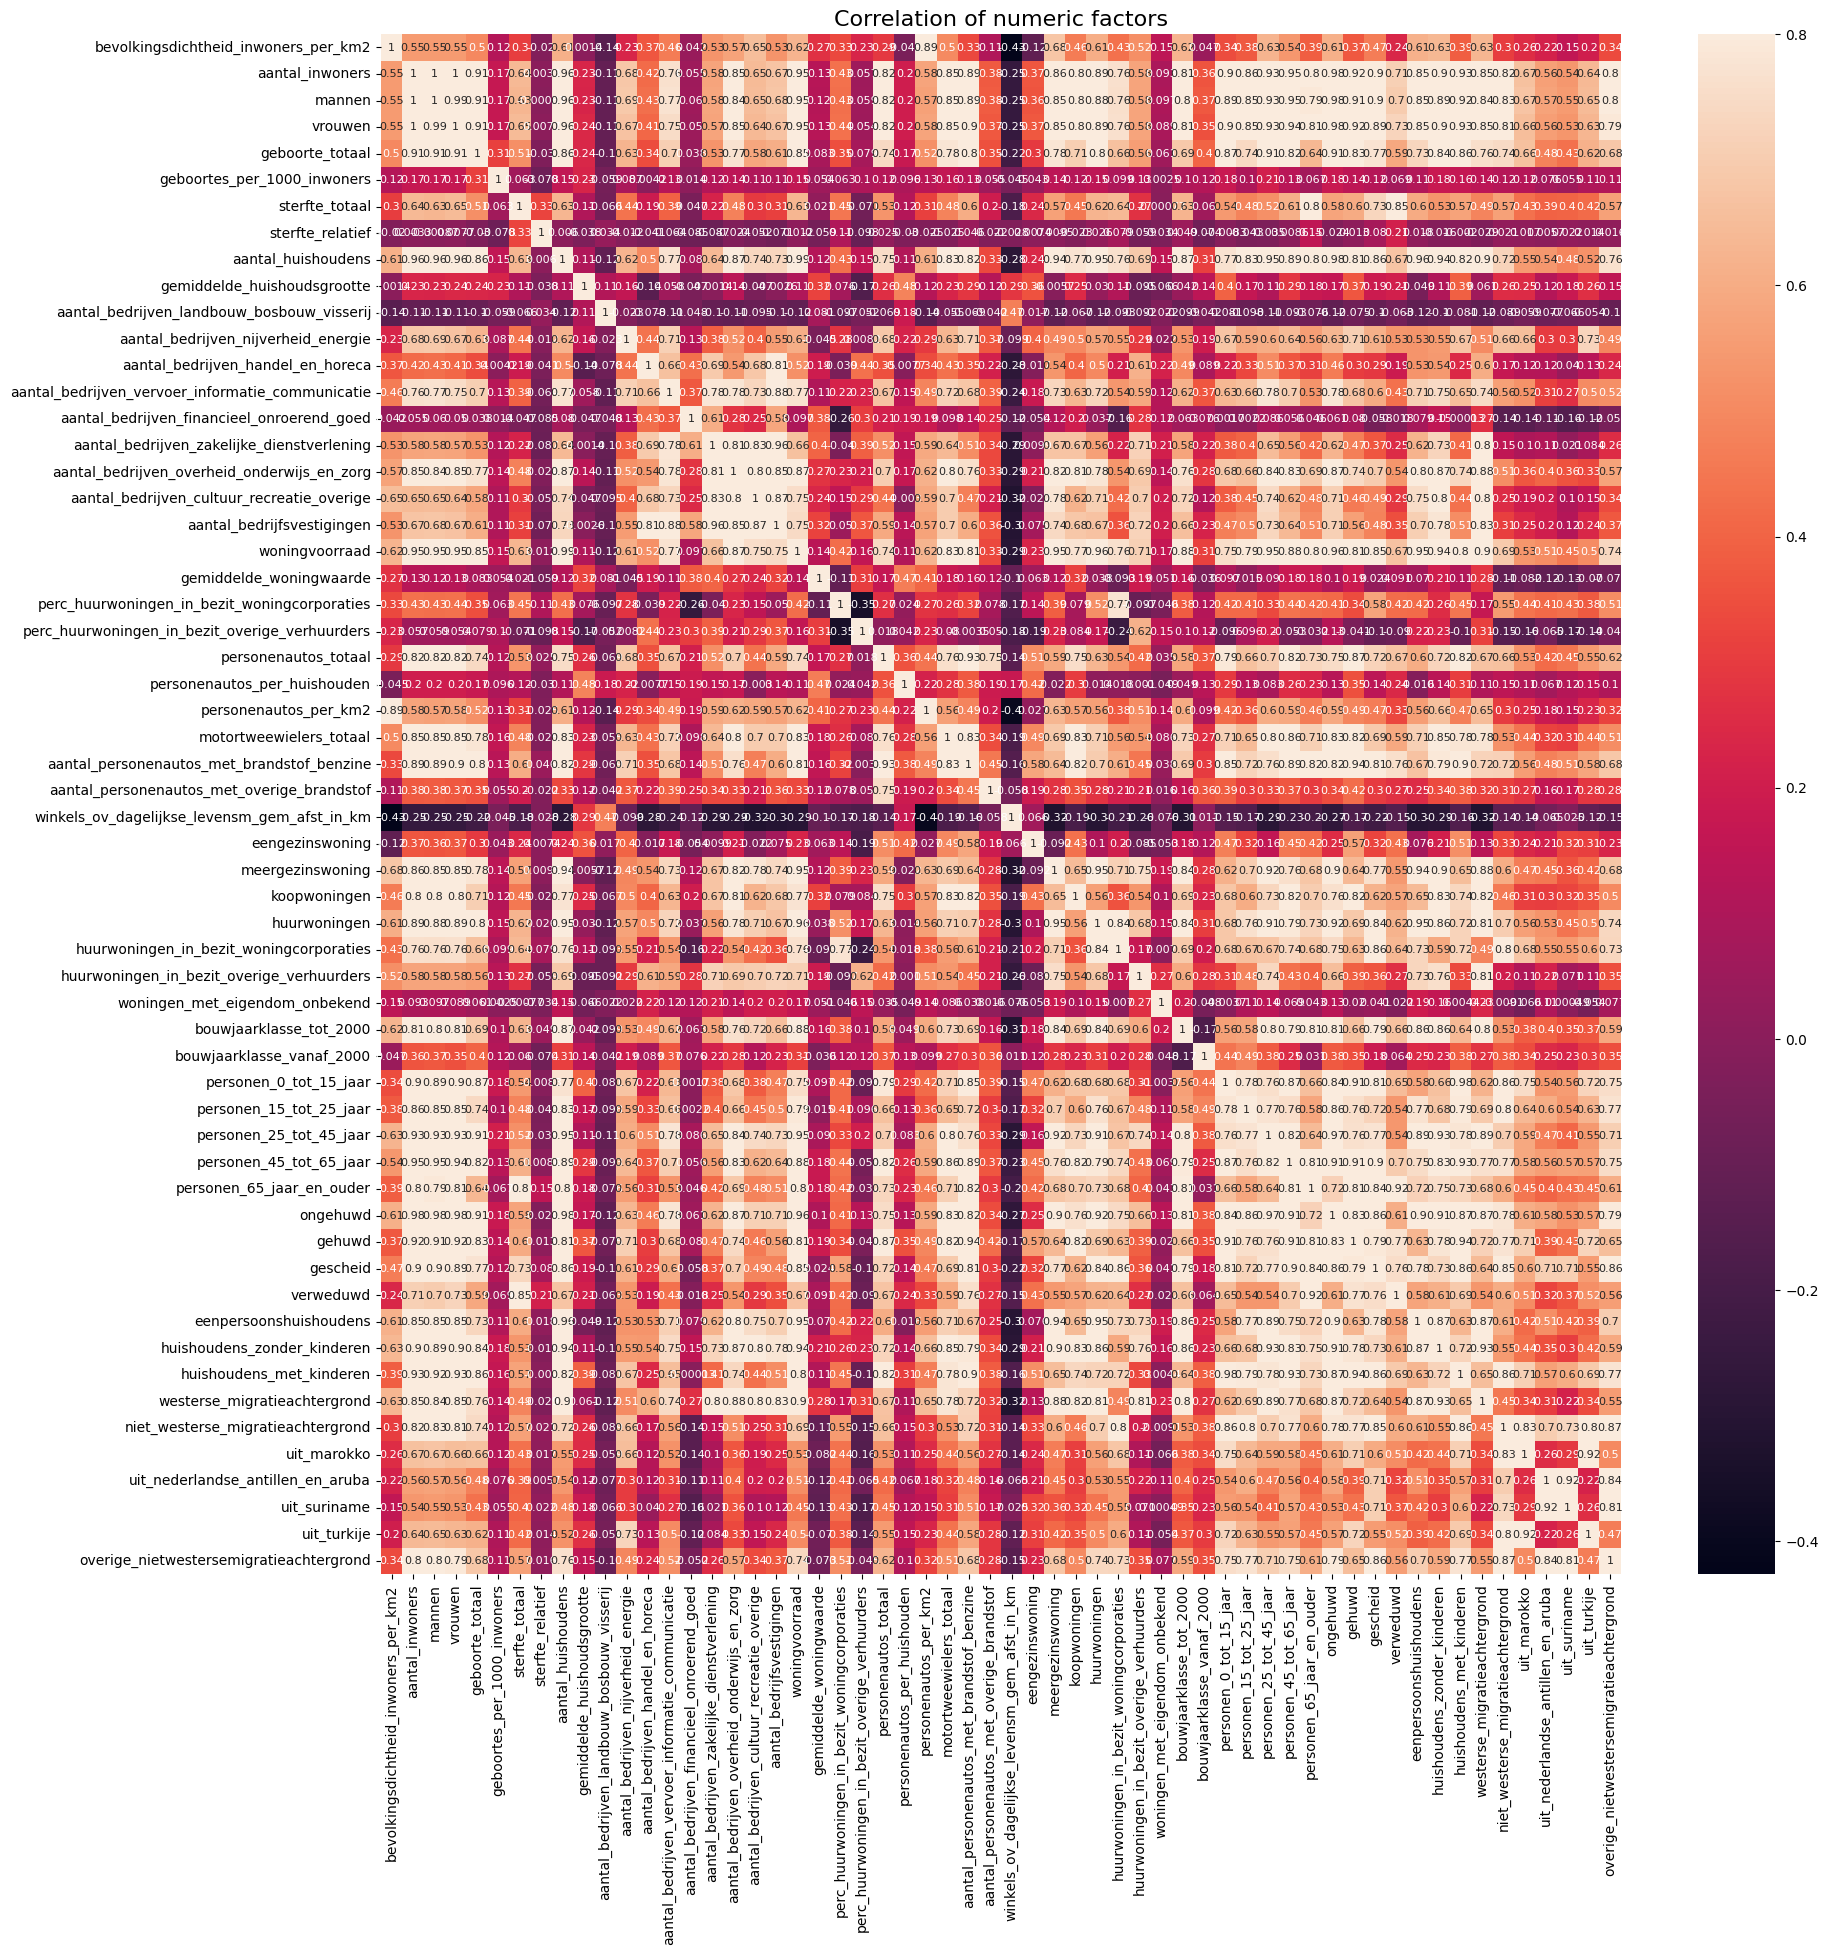

In [5]:
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize = (20,20))
plt.title('Correlation of numeric factors', y = 1, size = 16)
sns.heatmap(corr_matrix, vmax = .8, annot_kws={'size': 8}, annot = True)

In [6]:
def print_highly_correlated(df, features, threshold_down=0.7, threshold_up=1.0):
    """Prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    corr_df = df[features].corr()
    correlated_features = np.where((np.abs(corr_df) < threshold_up) & (np.abs(corr_df) > threshold_down)) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold_down)
    else:
        for v, i, j in s_corr_list:
            cols = df[features].columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [7]:
columns = [ column for column in numeric_data.columns if column not in ['aantal_inwoners', 'vrouwen', 'mannen', 'woningvoorraad'] ]
print_highly_correlated(numeric_data, columns)

personen_0_tot_15_jaar and huishoudens_met_kinderen = 0.976
aantal_huishoudens and ongehuwd = 0.976
personen_25_tot_45_jaar and ongehuwd = 0.970
aantal_bedrijven_zakelijke_dienstverlening and aantal_bedrijfsvestigingen = 0.957
aantal_huishoudens and eenpersoonshuishoudens = 0.956
aantal_huishoudens and personen_25_tot_45_jaar = 0.951
aantal_huishoudens and huurwoningen = 0.948
meergezinswoning and huurwoningen = 0.947
huurwoningen and eenpersoonshuishoudens = 0.946
gehuwd and huishoudens_met_kinderen = 0.944
meergezinswoning and eenpersoonshuishoudens = 0.943
aantal_huishoudens and huishoudens_zonder_kinderen = 0.940
aantal_huishoudens and meergezinswoning = 0.935
aantal_personenautos_met_brandstof_benzine and gehuwd = 0.935
personen_25_tot_45_jaar and huishoudens_zonder_kinderen = 0.935
personen_45_tot_65_jaar and huishoudens_met_kinderen = 0.930
personenautos_totaal and aantal_personenautos_met_brandstof_benzine = 0.929
huishoudens_zonder_kinderen and westerse_migratieachtergrond = 0